In [5]:
import numpy as np
import pandas as pd

In [7]:

df =pd.read_excel(r'C:\Users\user\Downloads\DS-assignment\DS - Assignment Part 1 data set.xlsx')
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [8]:
## Droppig transaction date  as not required for modelling
df.drop(["Transaction date"], axis= 1 ,inplace = True)
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [82]:
##DATA CLEANING 
##checking null values
chknull=pd.isnull(["House size (sqft)","Distance from nearest Metro station (km)","House price of unit area"])
chknull

array([False, False, False])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [84]:
##Taking insights of data
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [10]:

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

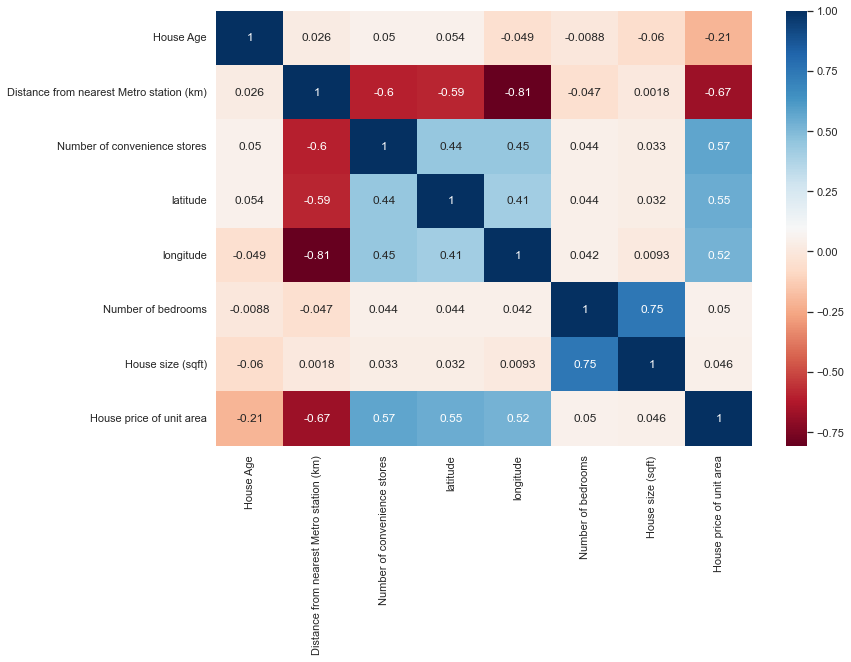

In [11]:
#chacking correalation between attributes
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()


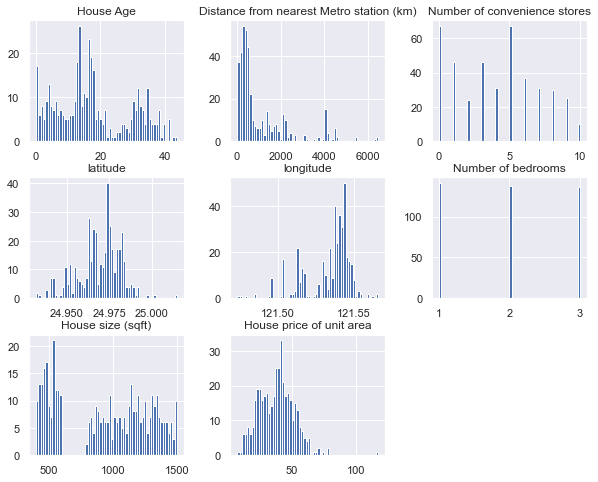

In [12]:
#analyzing distribution and pattern of data 
df.hist(bins=60, figsize=(10, 8))
plt.show()

<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>

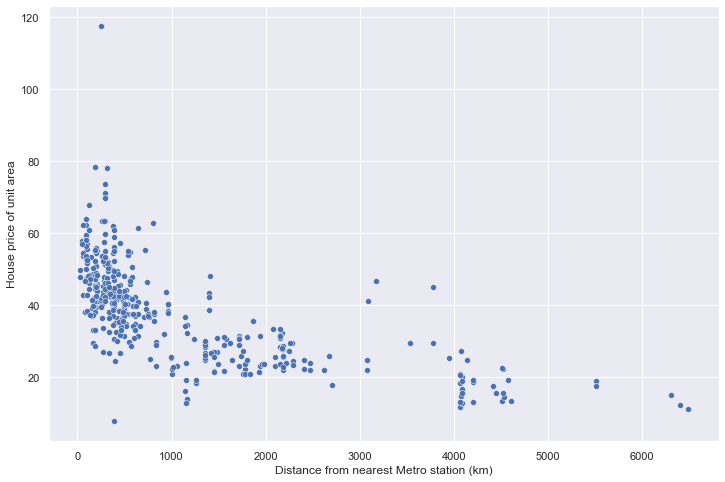

In [61]:
sns.scatterplot(x='Distance from nearest Metro station (km)', y ='House price of unit area',data= df)

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

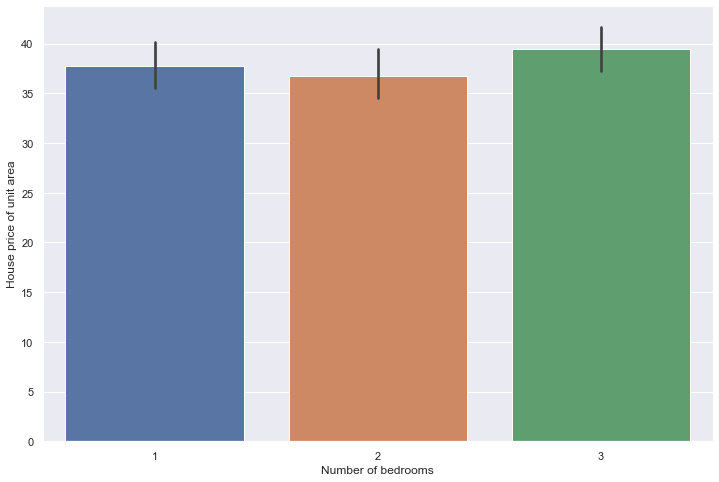

In [62]:
sns.barplot(x='Number of bedrooms', y='House price of unit area', data=df)

In [63]:
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

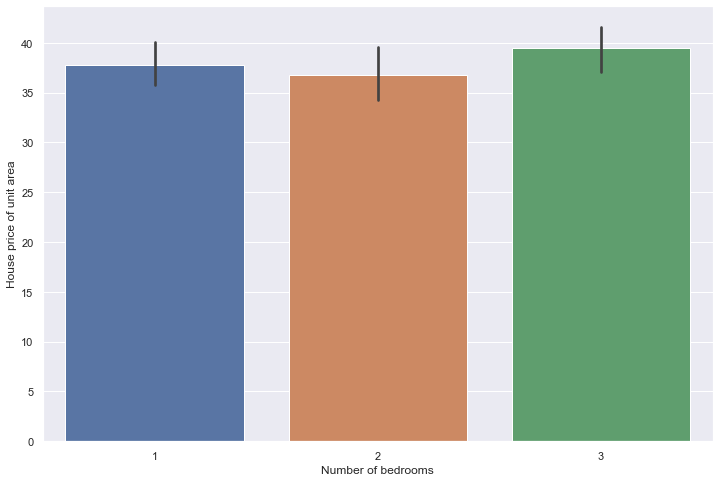

In [64]:
sns.barplot(x='Number of bedrooms', y='House price of unit area', data=df)

<AxesSubplot:xlabel='House Age', ylabel='House price of unit area'>

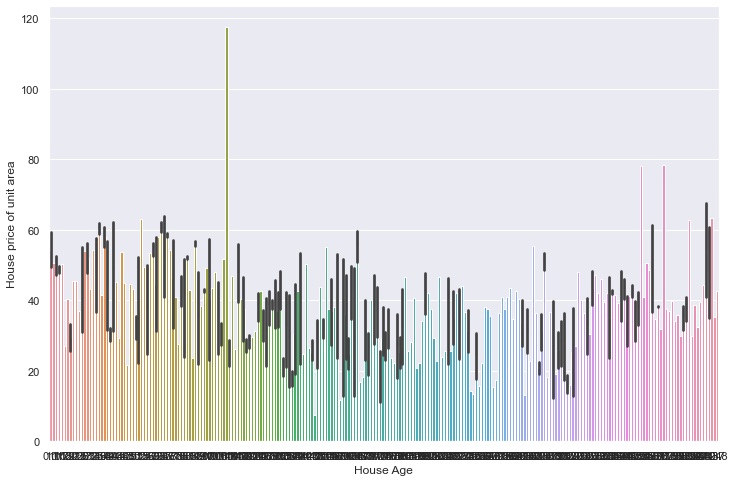

In [65]:
sns.barplot(x='House Age', y='House price of unit area', data=df)

<AxesSubplot:xlabel='House Age', ylabel='House price of unit area'>

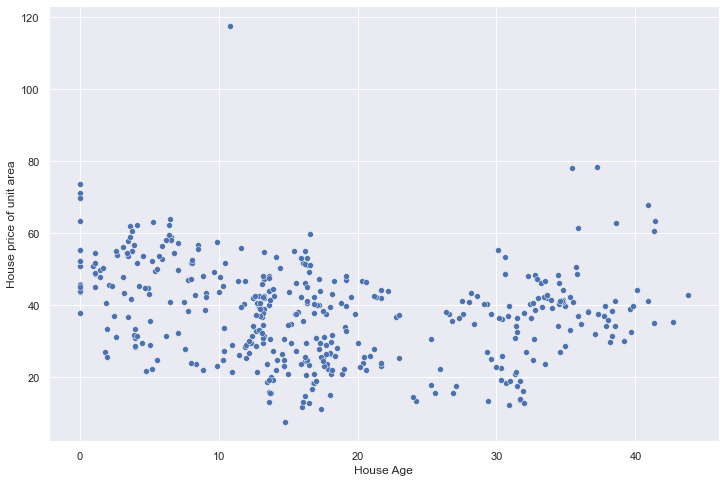

In [66]:
sns.scatterplot(x='House Age', y ='House price of unit area',data= df)

In [67]:
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [68]:
#splitting data set into Training set and Test set
X =df.drop(['House price of unit area'],axis=1)
Y=df['House price of unit area']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=20)

In [69]:
X_train.shape, X_test.shape

((351, 7), (63, 7))

In [70]:
##MODEL 1
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)  


LinearRegression()

In [71]:
#prediction on Training data
train_prediction=lr.predict(X_train)


In [72]:
e_score = metrics.r2_score(Y_train,train_prediction)
print(e_score)

0.5593782795253421


In [73]:
lr = linear_model.LinearRegression()

scores = cross_val_score(lr, X, Y, cv=5)

print("score",scores)

score [0.68069357 0.50804327 0.66356108 0.41582978 0.57476518]


<function matplotlib.pyplot.show(close=None, block=None)>

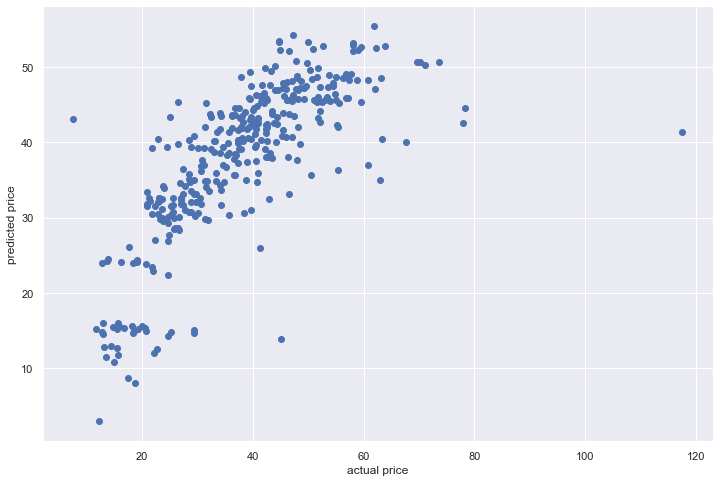

In [74]:
##plotting graph between actual and predicted price
plt.scatter(Y_train,train_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show

In [75]:
## MODEL2 lasso regression
from sklearn.linear_model import Lasso

In [76]:
lass_reg_model =Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [77]:
train_data_prediction =lass_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train,train_data_prediction)
print(error_score)

0.5319297133015677


In [78]:
##MODEL 3 Random forest regressor
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(X_train, Y_train)
Y_predict = rf_model.predict(X_test)
rf_model.score(X_train, Y_train)

0.9526731014586085

In [79]:
## accuracy score of random forest regressor is .9589. Hence ,It is preferred